# 1 ) INSTALL AND IMPORT LIBRARIES

In [1]:

!pip install yfinance as yfinance
!pip install mplfinance


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline


# 2) DATA COLLECTION

In [3]:
aqr_stocks = yf.download(" ADANIPORTS.NS JIOFIN.NS AXS   PANW SBIN.NS", start=datetime.datetime(2019, 1, 1),
                             end=datetime.datetime(2024,2,20), group_by='tickers')
aqr_stocks.head(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker     JIOFIN.NS                           SBIN.NS              \
Price           Open High Low Close Volume        Open        High   
Date                                                                 
2019-01-01       NaN  NaN NaN   NaN    NaN  280.020207  283.032201   
2019-01-02       NaN  NaN NaN   NaN    NaN  281.526165  284.726390   
2019-01-03       NaN  NaN NaN   NaN    NaN  277.667094  278.184767   
2019-01-04       NaN  NaN NaN   NaN    NaN  274.937482  281.432063   
2019-01-07       NaN  NaN NaN   NaN    NaN  283.361597  283.785168   
2019-01-08       NaN  NaN NaN   NaN    NaN  278.420056  288.020760   
2019-01-09       NaN  NaN NaN   NaN    NaN  288.020760  289.056134   
2019-01-10       NaN  NaN NaN   NaN    NaN  287.173656  289.432636   
2019-01-11       NaN  NaN NaN   NaN    NaN  287.455992  288.209005   
2019-01-14       NaN  NaN NaN   NaN    NaN  283.314539  285.761780   

Ticker                                          ...       PANW             \
Price              Low       Close      Volume  ...       Open       High   
Date                                            ...                         
2019-01-01  276.584671  281.996826  11837127.0  ...        NaN        NaN   
2019-01-02  275.878699  276.631683  25559853.0  ...  30.840000  31.195000   
2019-01-03  273.055002  273.996246  17548347.0  ...  30.228333  30.480000   
2019-01-04  274.372730  280.161377  19514041.0  ...  30.343332  31.021667   
2019-01-07  277.855340  278.890686  14579399.0  ...  30.879999  31.333332   
2019-01-08  277.431761  287.361877  22949961.0  ...  31.516666  31.900000   
2019-01-09  283.079227  287.361877  21109911.0  ...  31.703333  32.501667   
2019-01-10  285.667659  287.597198  16295468.0  ...  31.993334  32.766666   
2019-01-11  283.267472  284.961700  12702551.0  ...  32.701668  33.000000   
2019-01-14  281.949723  282.749786  10372933.0  ...  32.336666  32.711666   

Ticker                                             AXS                        \
Price             Low      Close     Volume       Open       High        Low   
Date                                                                           
2019-01-01        NaN        NaN        NaN        NaN        NaN        NaN   
2019-01-02  30.320000  30.535000  8865600.0  42.692833  43.120098  42.433126   
2019-01-03  29.799999  29.950001  6227400.0  42.542037  43.136857  42.525281   
2019-01-04  30.270000  30.731667  6733800.0  43.170364  44.753751  43.069832   
2019-01-07  30.786667  31.225000  7000800.0  44.401893  44.879423  44.158939   
2019-01-08  31.184999  31.738333  6576600.0  44.234330  44.669972  43.823824   
2019-01-09  31.695000  32.185001  6163200.0  44.644843  45.130749  44.460532   
2019-01-10  31.701668  32.666668  6265800.0  44.770509  45.122374  44.477290   
2019-01-11  32.521667  32.661667  5193000.0  44.988327  45.281546  44.745373   
2019-01-14  32.166668  32.488335  5907000.0  44.862664  45.449104  44.862664   

Ticker                            
Price           Close     Volume  
Date                              
2019-01-01        NaN        NaN  
2019-01-02  42.784988   968700.0  
2019-01-03  42.684460   844500.0  
2019-01-04  44.669975  1003200.0  
2019-01-07  44.217583   635500.0  
2019-01-08  44.427017   504300.0  
2019-01-09  45.005085   510300.0  
2019-01-10  45.080486   426500.0  
2019-01-11  45.147503   338900.0  
2019-01-14  45.231285   317400.0  

[10 rows x 25 columns]

# 3) DATA ANALYSIS

In [4]:
aqr_stocks.describe()

Ticker   JIOFIN.NS                                                    \
Price         Open        High         Low       Close        Volume   
count   122.000000  122.000000  122.000000  122.000000  1.220000e+02   
mean    236.705738  240.256557  233.034426  236.180737  3.089560e+07   
std      16.860367   17.708120   15.924556   16.833842  3.936135e+07   
min     202.800003  211.800003  202.800003  206.600006  4.289046e+06   
25%     224.537498  226.049999  220.950005  224.575001  1.251024e+07   
50%     235.000000  236.424995  232.050003  233.750000  1.842874e+07   
75%     246.650005  250.162498  241.500000  245.487503  3.137048e+07   
max     285.700012  295.700012  273.000000  289.100006  2.810401e+08   

Ticker      SBIN.NS                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   1269.000000  1269.000000  1269.000000  1269.000000  1.269000e+03  ...   
mean     397.891538   402.540045   392.677460   397.551555  3.104457e+07  ...   
std      141.381372   142.133347   140.689205   141.471272  2.542859e+07  ...   
min      143.022073   144.198622   140.668974   141.986725  3.692065e+06  ...   
25%      279.549532   284.726390   275.031645   279.926086  1.413038e+07  ...   
50%      407.521884   411.084115   403.342150   407.616882  2.179229e+07  ...   
75%      517.110925   524.829048   510.888271   517.786255  4.071885e+07  ...   
max      750.858371   761.824437   740.924915   749.137207  2.149557e+08  ...   

Ticker         PANW                                                       \
Price          Open         High          Low        Close        Volume   
count   1291.000000  1291.000000  1291.000000  1291.000000  1.291000e+03   
mean      70.837687    71.879314    69.816007    70.883377  8.209826e+06   
std       33.767095    34.297475    33.303266    33.860496  6.061568e+06   
min       21.938334    23.491667    20.911667    22.096666  2.135800e+06   
25%       39.801666    40.283333    39.297499    39.854166  5.247300e+06   
50%       65.316666    65.778336    64.488335    65.161667  6.825000e+06   
75%       89.424168    91.076668    87.670834    89.360832  9.011100e+06   
max      187.725006   190.419998   184.500000   188.449997  1.096470e+08   

Ticker          AXS                                                       
Price          Open         High          Low        Close        Volume  
count   1291.000000  1291.000000  1291.000000  1291.000000  1.291000e+03  
mean      48.098752    48.628788    47.558182    48.101549  5.515239e+05  
std        6.061914     6.021968     6.114503     6.080568  3.128039e+05  
min       28.644772    29.476912    27.005294    28.558975  1.031000e+05  
25%       45.339719    45.970787    44.873051    45.349096  3.511500e+05  
50%       49.559745    50.149737    49.021757    49.607071  4.684000e+05  
75%       52.372486    52.909054    51.848544    52.362165  6.432000e+05  
max       60.546974    60.828905    60.070611    60.342815  2.664200e+06  

[8 rows x 25 columns]

In [5]:
aqr_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1332 entries, 2019-01-01 to 2024-02-19
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (JIOFIN.NS, Open)        122 non-null    float64
 1   (JIOFIN.NS, High)        122 non-null    float64
 2   (JIOFIN.NS, Low)         122 non-null    float64
 3   (JIOFIN.NS, Close)       122 non-null    float64
 4   (JIOFIN.NS, Volume)      122 non-null    float64
 5   (SBIN.NS, Open)          1269 non-null   float64
 6   (SBIN.NS, High)          1269 non-null   float64
 7   (SBIN.NS, Low)           1269 non-null   float64
 8   (SBIN.NS, Close)         1269 non-null   float64
 9   (SBIN.NS, Volume)        1269 non-null   float64
 10  (ADANIPORTS.NS, Open)    1269 non-null   float64
 11  (ADANIPORTS.NS, High)    1269 non-null   float64
 12  (ADANIPORTS.NS, Low)     1269 non-null   float64
 13  (ADANIPORTS.NS, Close)   1269 non-null   float64
 14  (ADANI

In [6]:
aqr_stocks.shape

(1332, 25)

In [8]:
adj_close = pd.DataFrame()

In [11]:
tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS',  'PANW','SBIN.NS']
for ticker in tickers:
    adj_close[ticker] = aqr_stocks[ticker]['Close']

adj_close

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,375.101196,NaN,NaN,NaN,281.996826
2019-01-02,367.676300,NaN,42.784988,30.535000,276.631683
2019-01-03,364.590668,NaN,42.684460,29.950001,273.996246
2019-01-04,368.495941,NaN,44.669975,30.731667,280.161377
2019-01-07,368.013794,NaN,44.217583,31.225000,278.890686
...,...,...,...,...,...
2024-02-13,1259.396606,272.750000,58.252644,184.130005,701.683044
2024-02-14,1262.433472,273.000000,59.166489,184.164993,731.139038
2024-02-15,1261.636963,274.049988,60.342815,183.440002,749.137207


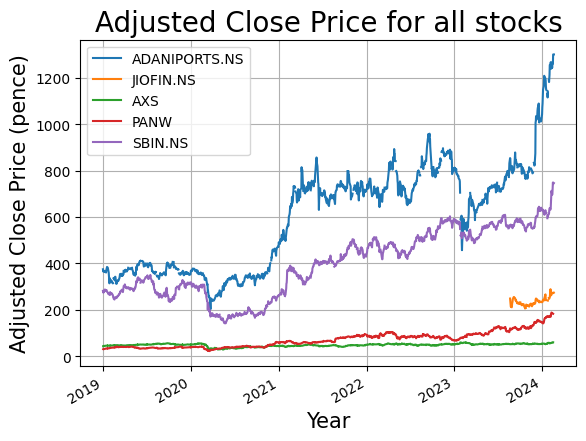

In [12]:
adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

In [13]:
adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()],
                              index=['min', 'max']))

adj_close_min_max

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
min,202.696457,206.600006,28.558975,22.096666,141.986725
max,1301.416260,289.100006,60.342815,188.449997,749.137207


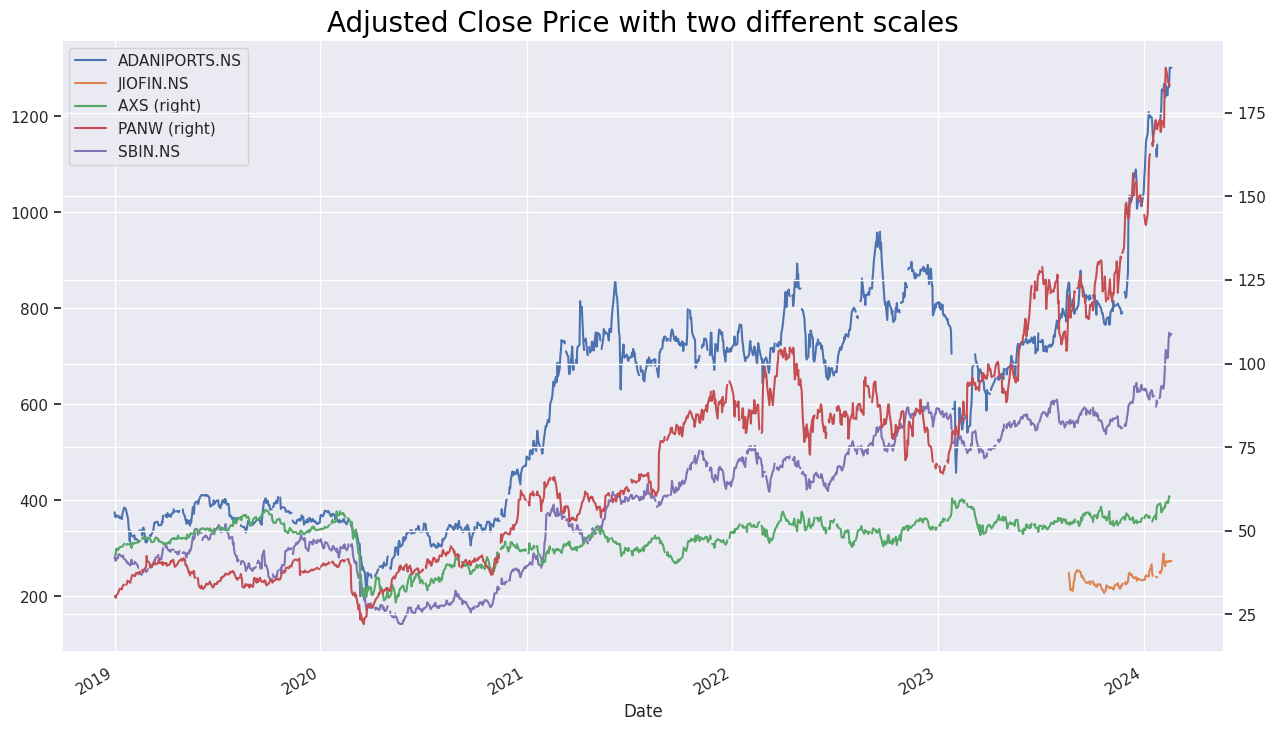

In [14]:
adj_close.plot(secondary_y = ["AXS", "PANW"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

# DATA TRANSFORMATION

In [15]:
returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()


,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,1.000000,NaN,NaN,NaN,1.000000
2019-01-02,0.980206,NaN,NaN,NaN,0.980974
2019-01-03,0.971979,NaN,NaN,NaN,0.971629
2019-01-04,0.982391,NaN,NaN,NaN,0.993491
2019-01-07,0.981105,NaN,NaN,NaN,0.988985


# 5.1) STOCK RETURN/ STOCK PROFIT THROUGHOUT THE  TIME PERIOD

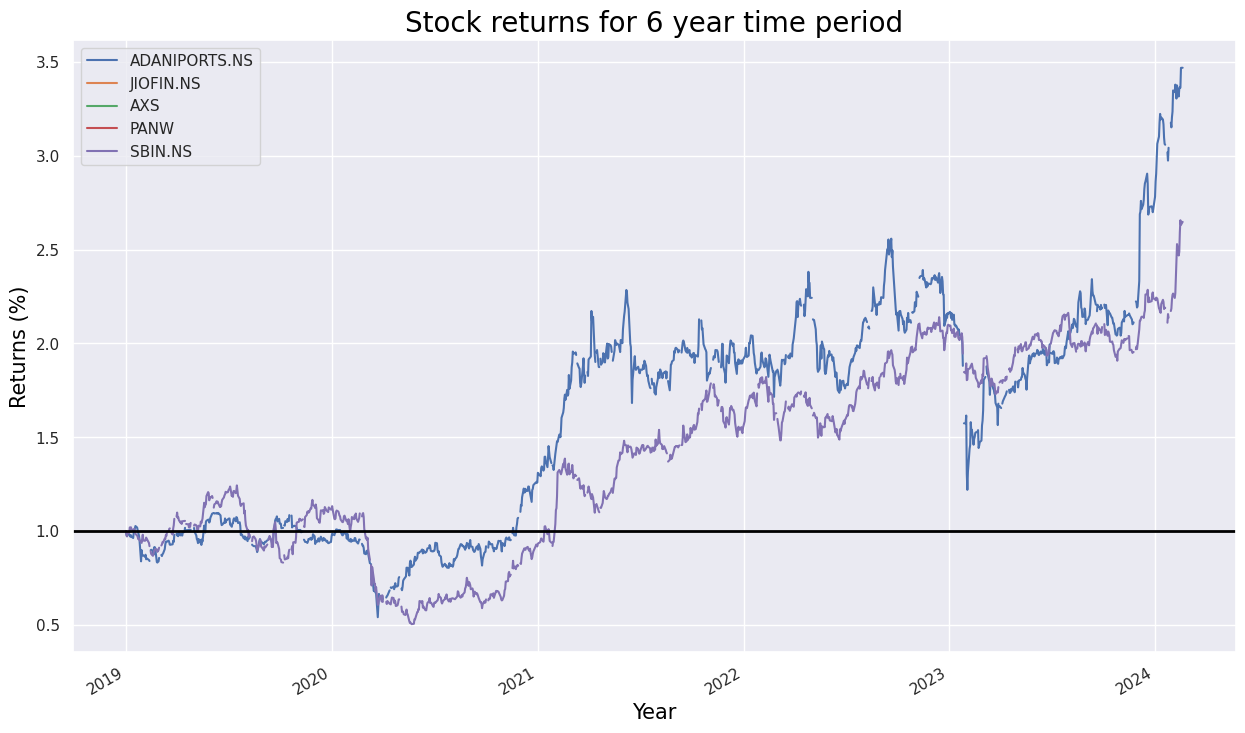

In [16]:
returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 6 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [19]:
returns = pd.DataFrame()


# 5.2) PRECENTAGE CHANGE

In [20]:
tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS','PANW' ,'SBIN.NS']
for ticker in tickers:
    returns[ticker] = aqr_stocks[ticker]['Close'].pct_change() * 100

returns

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,-1.979438,NaN,NaN,NaN,-1.902554
2019-01-03,-0.839225,NaN,-0.234963,-1.915831,-0.952688
2019-01-04,1.071139,NaN,4.651612,2.609902,2.250078
2019-01-07,-0.130842,NaN,-1.012744,1.605295,-0.453557
...,...,...,...,...,...
2024-02-13,1.236646,0.478905,-0.728967,-0.997390,0.784014
2024-02-14,0.241137,0.091659,1.568762,0.019002,4.197906
2024-02-15,-0.063093,0.384611,1.988164,-0.393664,2.461662


# CLEANING THE (NAN) VALUES FROM THE DATA AS THEIR IS NO PRICE CHANGE FROM THAT DAY BEFORE

In [21]:
returns.dropna(inplace=True)
returns.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-0.425340,-5.002008,-1.042810,-2.595407,-0.559744
2023-08-23,-3.370390,-4.990486,0.406737,0.468966,1.477586
2023-08-24,-0.405717,-4.985532,1.325721,-3.483835,0.008660
2023-08-25,-1.915246,0.491920,-1.108496,1.455264,-1.213272
2023-08-28,0.105381,-1.561774,0.257269,0.719364,0.508806


# Plot returns for 2023

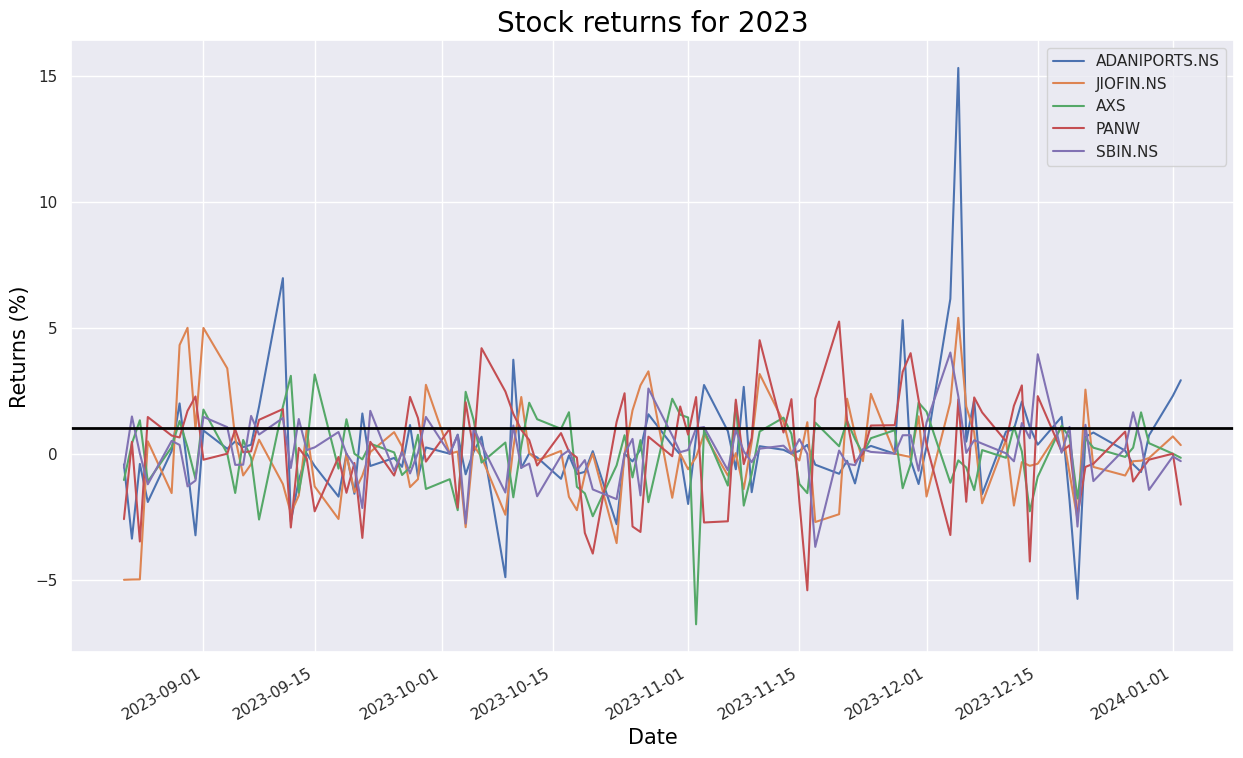

In [22]:

returns.loc['2019-01-01':'2024-1-2'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [23]:
stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))

stock_change.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.019993,NaN,NaN,NaN,-0.019209
2019-01-03,-0.008428,NaN,-0.002352,-0.019344,-0.009573
2019-01-04,0.010654,NaN,0.045467,0.025764,0.022251
2019-01-07,-0.001309,NaN,-0.010179,0.015925,-0.004546


In [24]:
stock_change.dropna(inplace=True)
stock_change.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-0.004262,-0.051314,-0.010483,-0.026297,-0.005613
2023-08-23,-0.034285,-0.051193,0.004059,0.004679,0.014668
2023-08-24,-0.004065,-0.051141,0.013170,-0.035460,0.000087
2023-08-25,-0.019338,0.004907,-0.011147,0.014448,-0.012207
2023-08-28,0.001053,-0.015741,0.002569,0.007168,0.005075


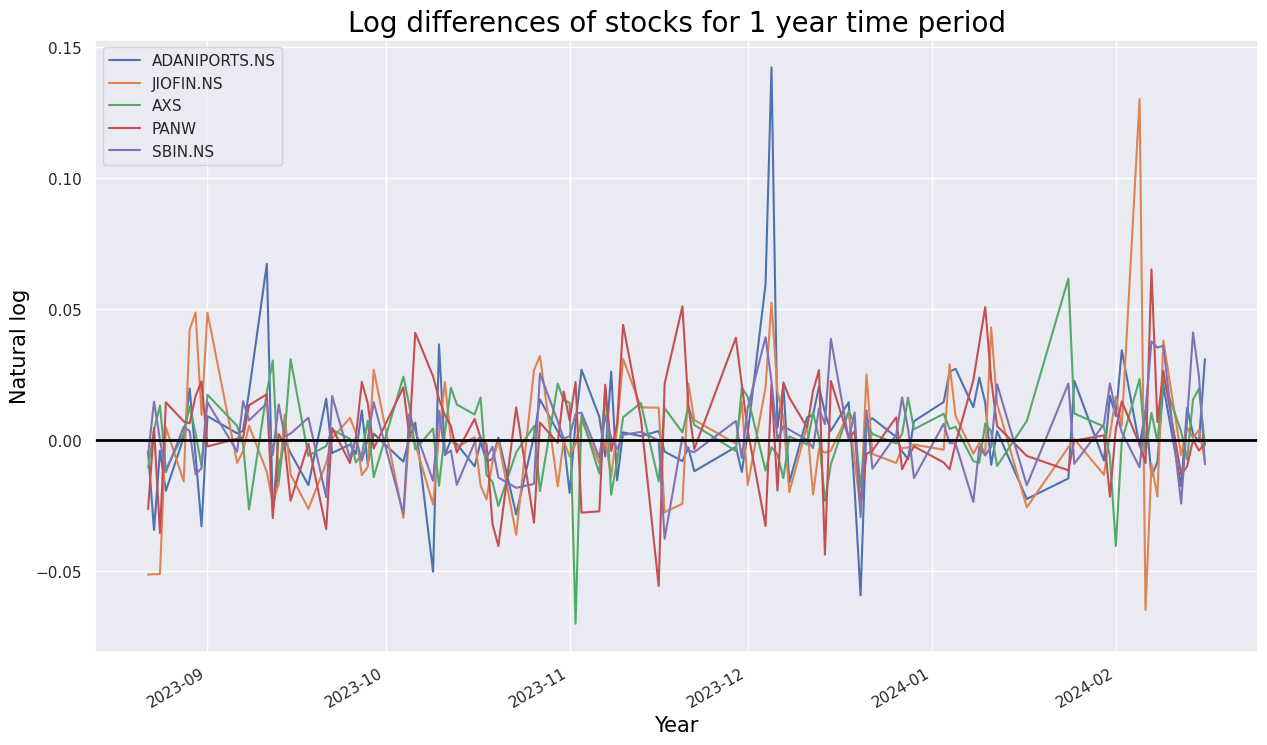

In [25]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 1 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

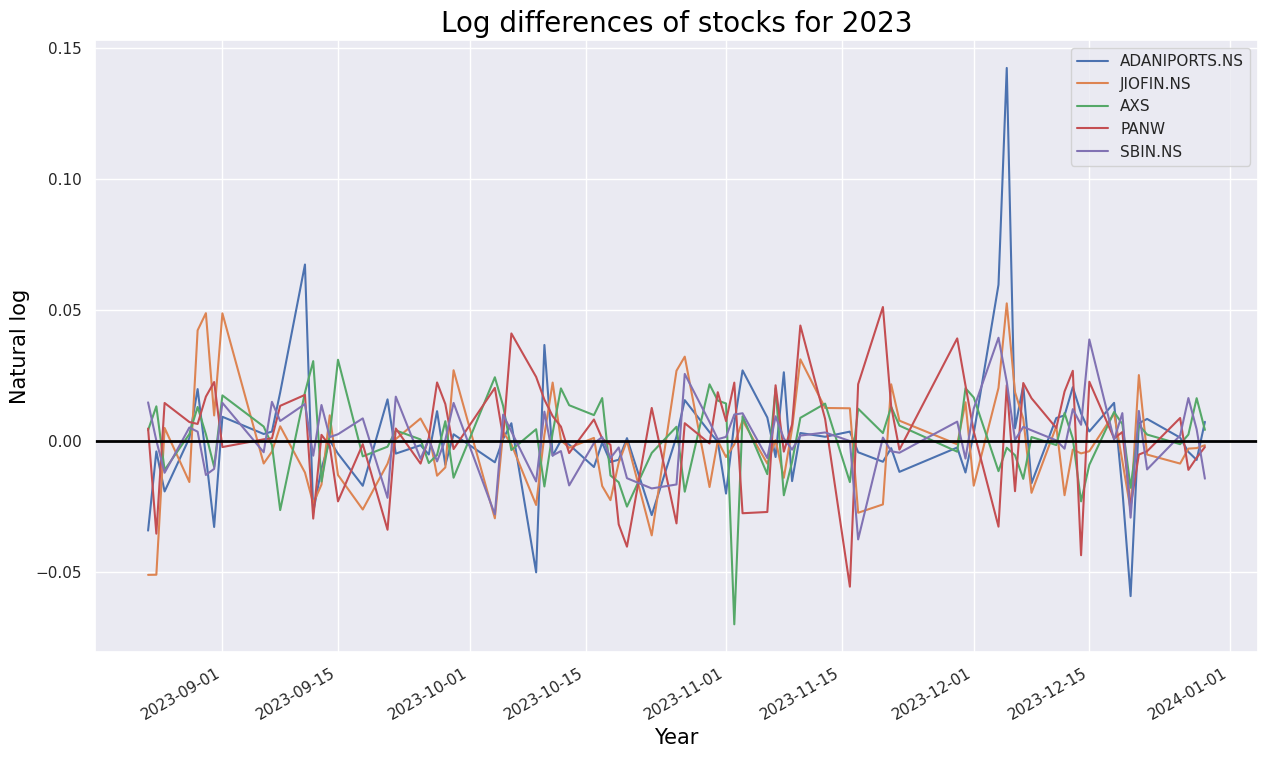

In [26]:
stock_change.loc['2019-01-01':'2024-1-1'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2023', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

# 5.3) ANNUAL RETUNRS

In [27]:
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-107.414241,-1293.123602,-264.168012,-662.679924,-141.451743
2023-08-23,-863.981150,-1290.067325,102.289745,117.903127,369.627688
2023-08-24,-102.448645,-1288.753438,331.886590,-893.584017,2.182125
2023-08-25,-487.323768,123.659914,-280.900692,364.083678,-307.614426
2023-08-28,26.542115,-396.672845,64.748498,180.630736,127.894056
...,...,...,...,...,...
2024-02-12,-442.862985,-143.483505,83.639454,-331.800208,-610.182191
2024-02-13,309.723652,120.396009,-184.372637,-252.604099,196.800992
2024-02-14,60.693257,23.087496,392.259083,4.788052,1036.270515


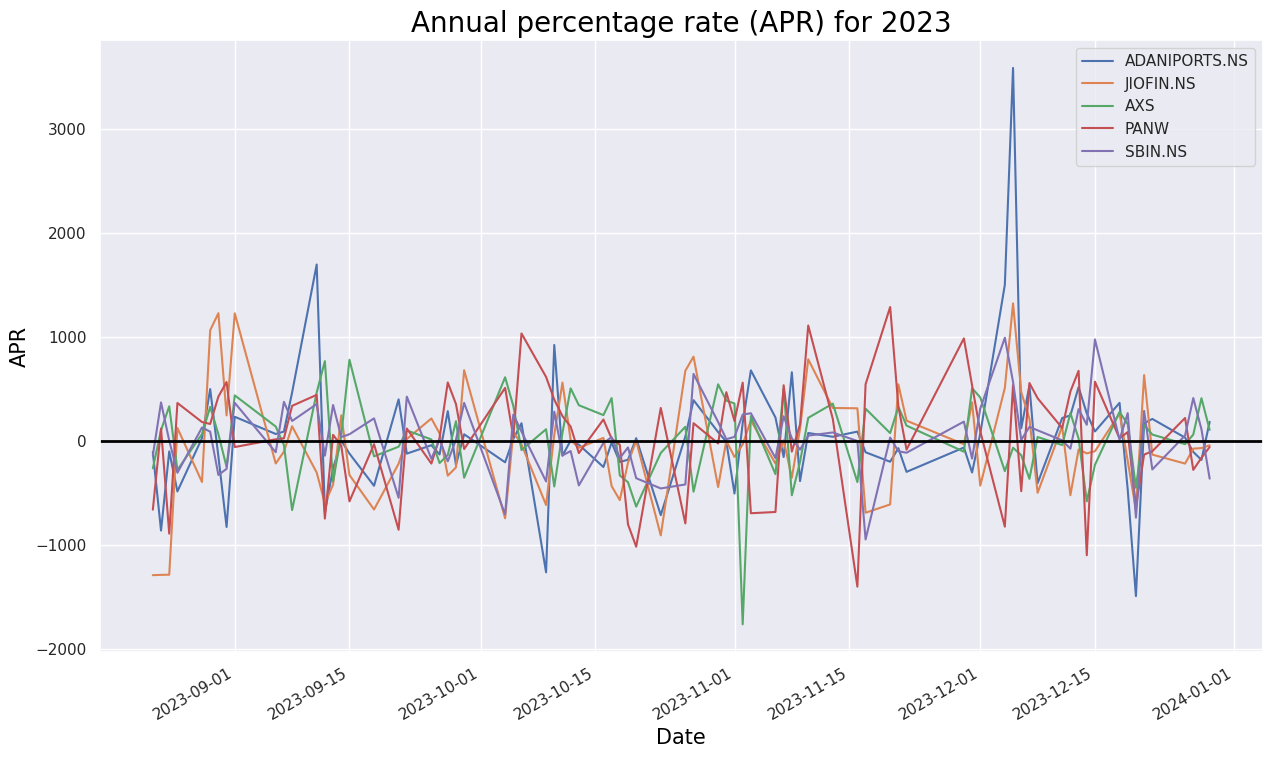

In [28]:
stock_change_apr['2023-01-01':'2023-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);


In [29]:
#Calculating statistical data for returns

# Date of worst single day returns

returns.idxmin()


,0
ADANIPORTS.NS,2023-12-20
JIOFIN.NS,2024-01-16
AXS,2023-11-02
PANW,2023-11-16
SBIN.NS,2023-11-17


In [30]:
# Date of best single day returns

returns.idxmax()

,0
ADANIPORTS.NS,2023-12-05
JIOFIN.NS,2024-02-05
AXS,2024-01-24
PANW,2024-02-07
SBIN.NS,2024-02-14


In [31]:
# Compute mean to give a representation of the average expected returns

returns.mean()

,0
ADANIPORTS.NS,0.350483
JIOFIN.NS,0.103405
AXS,0.120807
PANW,0.345622
SBIN.NS,0.229856


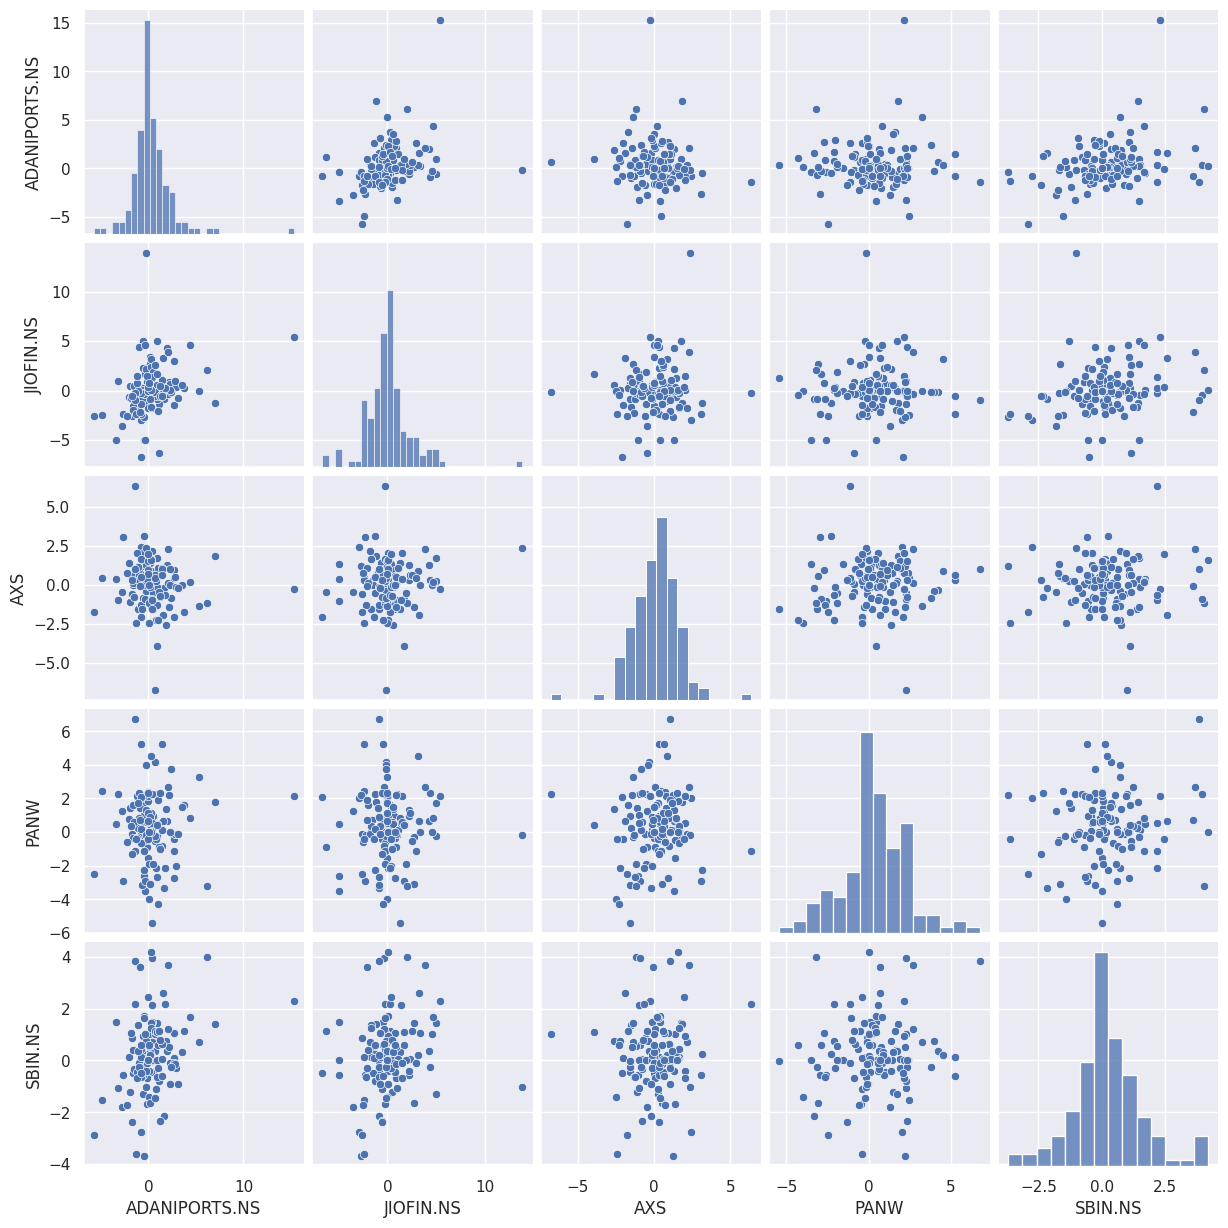

In [32]:
sns.pairplot(returns);

<ipython-input-33-076a4f7c09e8>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2023-01-01':'2023-12-31'][ticker], color='green', bins=100, ax=axs[index])
<ipython-input-33-076a4f7c09e8>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2023-01-01':'2023-12-31'][ticke

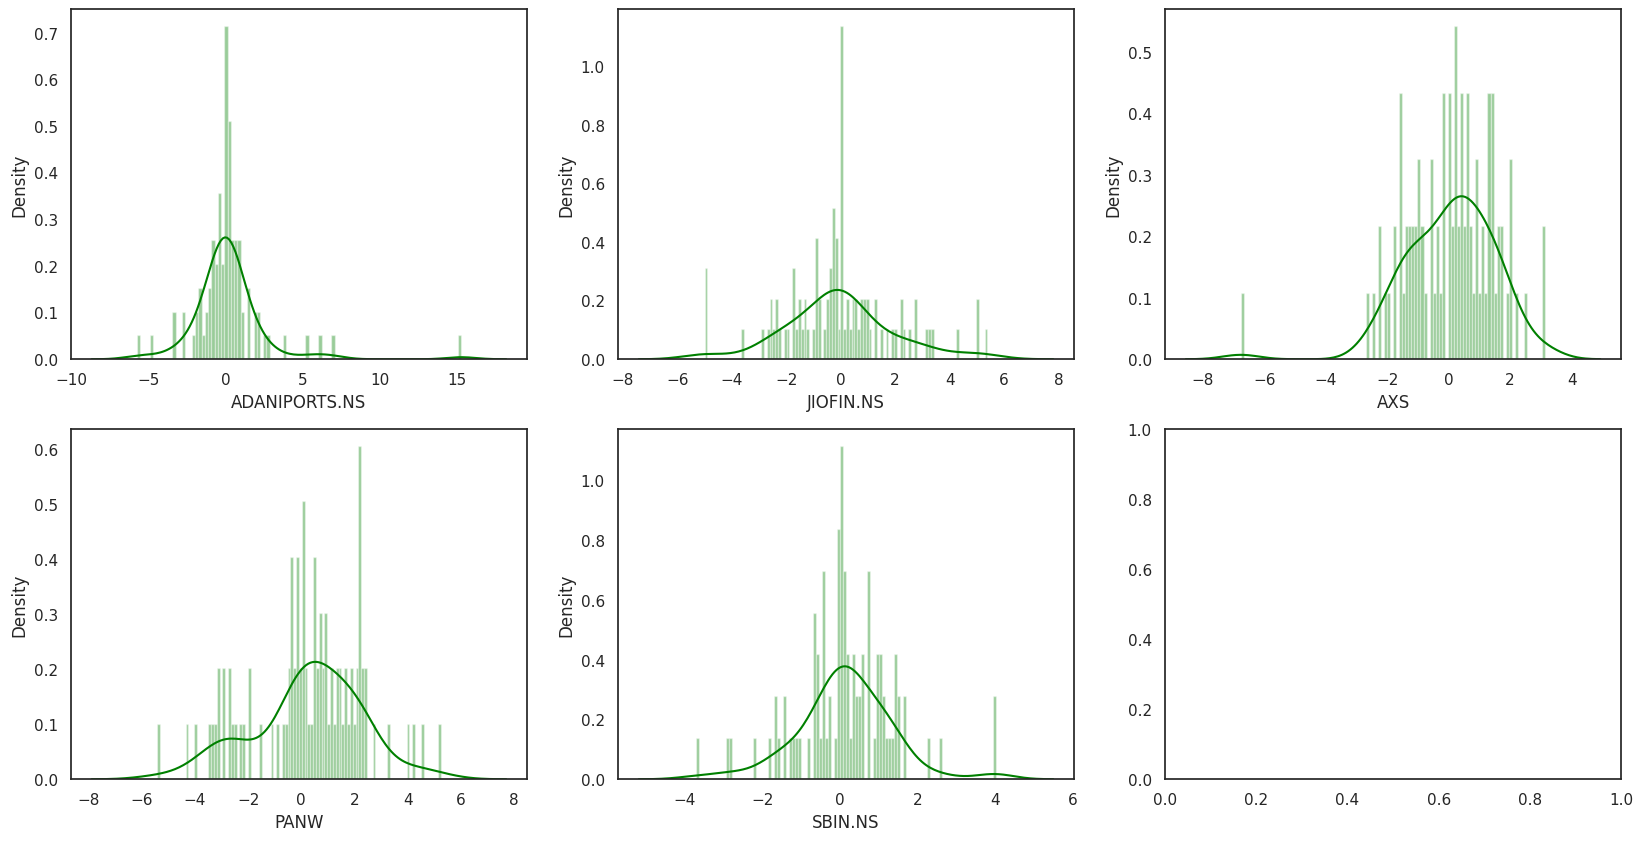

In [33]:
# Distribution plots showing the data for returns for 2019

sns.set_style("white")

tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS',  'PANW','SBIN.NS']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2023-01-01':'2023-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

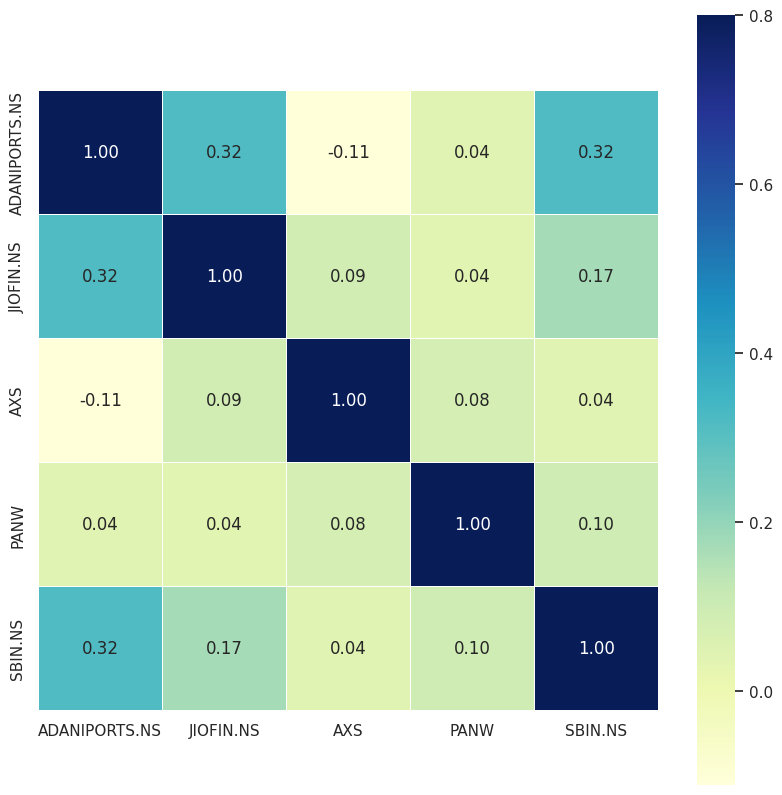

In [34]:
# The heatmap clearly ,the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

# FTSE 100 Index data


In [35]:
ftse100_idx_to_2020 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1),
                                     end=datetime.datetime(2021, 1, 1))
ftse100_idx_to_2020


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^FTSE,^FTSE,^FTSE,^FTSE,^FTSE
Date,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,0
1984-01-04,998.599976,999.500000,993.299988,997.500000,0
1984-01-05,1015.799988,1015.799988,1007.099976,1007.099976,0
1984-01-06,1029.000000,1029.300049,1019.000000,1019.000000,0
1984-01-09,1034.599976,1035.400024,1030.599976,1030.599976,0
...,...,...,...,...,...
2020-12-23,6495.799805,6497.299805,6431.200195,6453.200195,807695400
2020-12-24,6502.100098,6530.299805,6479.600098,6495.799805,477470700


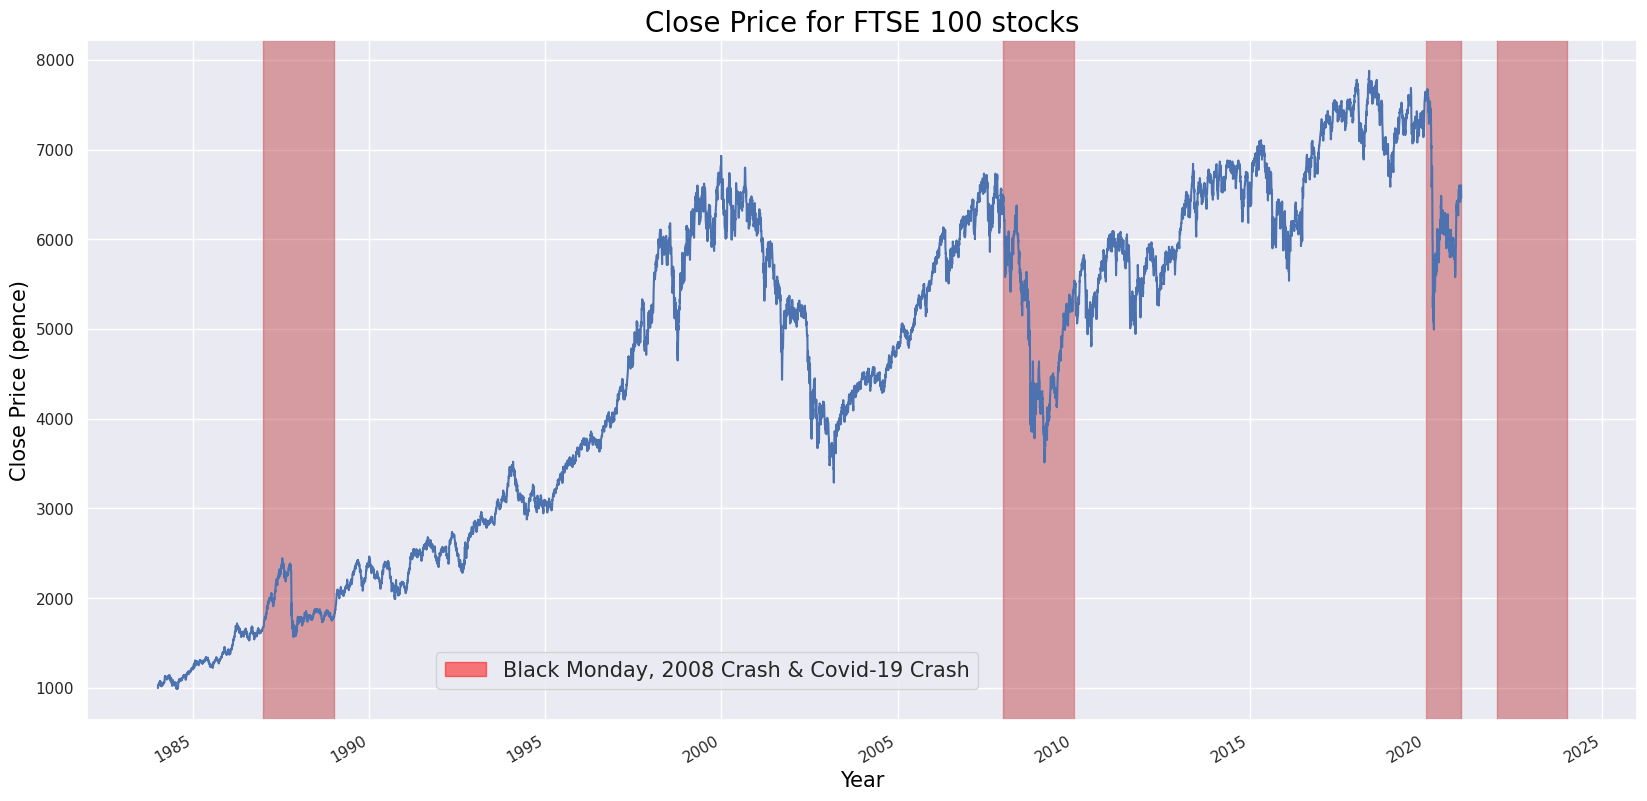

In [37]:
def ftse100_to_2024_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    plt.axvspan('2022','2024',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2024_plot()